In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
def dostuff(df):
    ns = df.groupby('A').ns.median()
    res = df.drop(columns=['iters', 'ns'])[:len(ns)]
    res['ns'] = ns.values
    return res

In [115]:
cpu = dostuff(pd.read_csv('./bench_cpu.txt', index_col=0))
gpu_1 = dostuff(pd.read_csv('./bench_1.txt', index_col=0))
gpu_32 = dostuff(pd.read_csv('./bench_32.txt', index_col=0))
gpu_comb = dostuff(pd.read_csv('./bench_combined.txt', index_col=0))

In [121]:
cpu

,A,b,size,mean_nonzero,ns
4,../data/0081920_shallow_water2_A.mtx,NaN,81920,2,6.064688e+08
12,../data/1228045_thermal2_A.mtx,../data/1228045_thermal2_b.mtx,1228045,3,2.579022e+10
6,../data/0115967_torso2_A.mtx,NaN,115967,8,1.573723e+09
10,../data/0503625_af_2_k101_A.mtx,../data/0503625_af_2_k101_b.mtx,503625,17,3.582786e+10
0,../data/0007102_Kuu_A.mtx,NaN,7102,24,3.353443e+08
11,../data/0952203_ldoor_A.mtx,NaN,952203,24,9.809931e+10
8,../data/0217918_pwtk_A.mtx,NaN,217918,27,1.709476e+10
3,../data/0062451_cant_A.mtx,NaN,62451,32,3.121450e+09
9,../data/0268096_Ga41As41H72_A.mtx,NaN,268096,34,2.971921e+10
5,../data/0083334_consph_A.mtx,NaN,83334,36,5.765906e+09


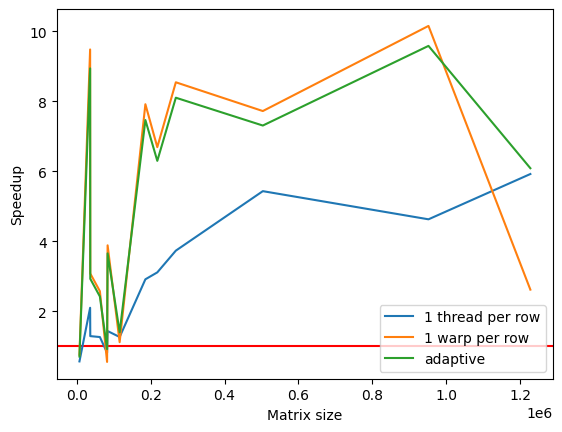

In [116]:
plt.figure()
plt.axhline(1, c='r')
plt.plot(cpu['size'], cpu.ns / gpu_1.ns, label='1 thread per row')
plt.plot(cpu['size'], cpu.ns / gpu_32.ns, label='1 warp per row')
plt.plot(cpu['size'], cpu.ns / gpu_comb.ns, label='adaptive')
plt.xlabel('Matrix size')
plt.ylabel('Speedup')
plt.legend()

In [117]:
cpu = cpu.sort_values('mean_nonzero')
gpu_1 = gpu_1.sort_values('mean_nonzero')
gpu_32 = gpu_32.sort_values('mean_nonzero')
gpu_comb = gpu_comb.sort_values('mean_nonzero')

In [118]:
cpu

,A,b,size,mean_nonzero,ns
4,../data/0081920_shallow_water2_A.mtx,NaN,81920,2,6.064688e+08
12,../data/1228045_thermal2_A.mtx,../data/1228045_thermal2_b.mtx,1228045,3,2.579022e+10
6,../data/0115967_torso2_A.mtx,NaN,115967,8,1.573723e+09
10,../data/0503625_af_2_k101_A.mtx,../data/0503625_af_2_k101_b.mtx,503625,17,3.582786e+10
0,../data/0007102_Kuu_A.mtx,NaN,7102,24,3.353443e+08
11,../data/0952203_ldoor_A.mtx,NaN,952203,24,9.809931e+10
8,../data/0217918_pwtk_A.mtx,NaN,217918,27,1.709476e+10
3,../data/0062451_cant_A.mtx,NaN,62451,32,3.121450e+09
9,../data/0268096_Ga41As41H72_A.mtx,NaN,268096,34,2.971921e+10
5,../data/0083334_consph_A.mtx,NaN,83334,36,5.765906e+09


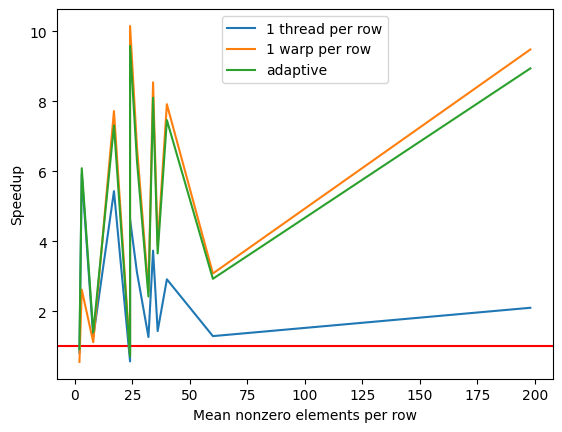

In [119]:
plt.figure()
plt.axhline(1, c='r')
plt.plot(cpu['mean_nonzero'], cpu.ns / gpu_1.ns, label='1 thread per row')
plt.plot(cpu['mean_nonzero'], cpu.ns / gpu_32.ns, label='1 warp per row')
plt.plot(cpu['mean_nonzero'], cpu.ns / gpu_comb.ns, label='adaptive')
plt.xlabel('Mean nonzero elements per row')
plt.ylabel('Speedup')
plt.legend()

In [120]:
print(f"gpu1 speedup: min={np.min(cpu.ns / gpu_1.ns):.2f} max={np.max(cpu.ns / gpu_1.ns):.2f} mean={np.mean(cpu.ns / gpu_1.ns):.2f}")
print(f"gpu32 speedup: min={np.min(cpu.ns / gpu_32.ns):.2f} max={np.max(cpu.ns / gpu_32.ns):.2f} mean={np.mean(cpu.ns / gpu_32.ns):.2f}")
print(f"combined speedup: min={np.min(cpu.ns / gpu_comb.ns):.2f} max={np.max(cpu.ns / gpu_comb.ns):.2f} mean={np.mean(cpu.ns / gpu_comb.ns):.2f}")


gpu1 speedup: min=0.57 max=5.92 mean=2.65
gpu32 speedup: min=0.55 max=10.15 mean=5.01
combined speedup: min=0.71 max=9.58 mean=5.06
